# ML Manual


### 실습(11)

 데이터 전처리
 

In [2]:
import os
print(os.getcwd())  # 현재 작업 디렉토리 출력


f:\박정현\ML\Jeju_Water


In [3]:
import pandas as pd

# 파일 읽기
jeju = pd.read_excel(r'F:\박정현\ML\Jeju_Water\JejuData.xlsx', engine='openpyxl')
data = jeju.copy()
# 컬럼 이름 트리밍
data.columns = data.columns.str.strip()

# 제거할 컬럼 리스트
drop_col = ['id', 'NO3-N_sum', '95Quantile', 'Count', 'median', '토지피복_1',
            '토지피복_2', '토지피복_3', '토지피복_4','토지피복_6', '토지피복_7', '토지피복_9', 
            '모암모재_0', '모암모재_1', '모암모재_3', '모암모재_4', '모암모재_6', '모암모재_8', 
            '모암모재_9', '토양유형_0','토양유형_1','토양유형_2', '토양유형_3', '토양유형_4', '토양유형_5', 
            '토양유형_6', '토양유형_7', '토양유형_8', '토양유형_9', '토양유형10', '토양유형11', 
            '토양유형12', '토지피복총', '제3기층비?', '토양유형총', '인덱스값', 'x', 'y']


# 불필요한 컬럼 제거 및 결측값 제거
data = data.drop(drop_col, axis=1, errors='ignore')
data = data.dropna()

# 데이터 필터링 및 타입 변환
data = data[data['mean'] != 'no']
data['mean'] = data['mean'].astype(float)

# 컬럼 선택
data_mean = data['mean']
data_x = data.iloc[:, 1:]

data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 1 to 596
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean    440 non-null    float64
 1   시가화비율   440 non-null    float64
 2   농업비율    440 non-null    float64
 3   산림비율    440 non-null    float64
 4   초지비율    440 non-null    float64
 5   나지비율    440 non-null    float64
 6   모암모재총   440 non-null    int64  
 7   산성암비율   440 non-null    float64
 8   염기성암비   440 non-null    float64
 9   퇴적암비율   440 non-null    float64
 10  화산회비율   440 non-null    float64
 11  보통논     440 non-null    float64
 12  미숙논비율   440 non-null    float64
 13  임지비율    440 non-null    float64
 14  습논비율    440 non-null    float64
 15  염해논비율   440 non-null    float64
 16  보통밭비율   440 non-null    float64
 17  임지2비율   440 non-null    float64
 18  사질밭비율   440 non-null    float64
 19  중점밭비율   440 non-null    float64
 20  화산회밭비   440 non-null    float64
 21  임지3비율   440 non-null    float64
 22  개인하수처  

In [4]:
## 측정된 NO3-N농도가 없는 격자 제거 작업이 생략됨
# 총 600개의 격자 중 440개의 격자를 본 사례에 사용

In [5]:
data.corr()
# 기술통계

,mean,시가화비율,농업비율,산림비율,초지비율,나지비율,모암모재총,산성암비율,염기성암비,퇴적암비율,...,저류지,지열이용시,지정폐기물,축산폐수배,특정토양오,폐기물처리,폐수배출시,하수처리장,평균고도,농업인덱스
mean,1.000000,0.168143,0.518074,-0.418899,-0.391414,0.046320,-0.157917,-0.046001,0.398614,0.209286,...,0.241140,-0.034960,-0.005609,0.093818,0.015298,0.005789,-0.003507,0.131411,-0.561328,0.452144
시가화비율,0.168143,1.000000,0.064680,-0.446725,-0.425316,0.115966,-0.551853,-0.014668,0.563994,0.089058,...,-0.027045,-0.072625,0.594085,-0.151371,0.639356,0.091247,0.551104,0.092836,-0.451767,0.073387
농업비율,0.518074,0.064680,1.000000,-0.746060,-0.581913,-0.105882,0.051338,-0.053252,0.388830,0.042209,...,0.227127,0.149343,-0.087060,0.231363,-0.057658,-0.060374,-0.066054,0.061891,-0.641112,0.868234
산림비율,-0.418899,-0.446725,-0.746060,1.000000,0.211898,-0.068539,0.153739,0.073287,-0.468911,-0.068965,...,-0.137500,-0.076699,-0.167989,-0.131145,-0.210541,-0.008852,-0.166436,-0.104615,0.671412,-0.688730
초지비율,-0.391414,-0.425316,-0.581913,0.211898,1.000000,0.052992,0.244657,-0.002324,-0.474071,-0.064575,...,-0.137630,-0.053877,-0.178814,-0.029754,-0.215949,0.027675,-0.175780,-0.043922,0.503517,-0.466848
나지비율,0.046320,0.115966,-0.105882,-0.068539,0.052992,1.000000,-0.252099,-0.015547,-0.098990,0.112864,...,-0.019684,-0.061246,-0.056165,-0.105833,0.023919,-0.064233,-0.036062,0.050827,-0.086691,-0.075959
모암모재총,-0.157917,-0.551853,0.051338,0.153739,0.244657,-0.252099,1.000000,0.002357,-0.272681,-0.208806,...,0.086229,0.110393,0.007186,0.178882,-0.068075,0.079363,0.009759,-0.162634,0.321620,0.015105
산성암비율,-0.046001,-0.014668,-0.053252,0.073287,-0.002324,-0.015547,0.002357,1.000000,-0.041281,0.013769,...,0.004172,0.028863,-0.013998,-0.039199,-0.032510,-0.026254,-0.026216,-0.013591,0.051865,-0.050533
염기성암비,0.398614,0.563994,0.388830,-0.468911,-0.474071,-0.098990,-0.272681,-0.041281,1.000000,0.105389,...,0.079911,-0.049675,0.367000,0.040644,0.377218,0.073913,0.343742,0.032151,-0.455569,0.333702
퇴적암비율,0.209286,0.089058,0.042209,-0.068965,-0.064575,0.112864,-0.208806,0.013769,0.105389,1.000000,...,-0.003907,-0.042108,-0.024305,-0.087381,0.034225,-0.044842,-0.038652,0.134923,-0.154292,0.013884


In [6]:
print(data.columns)



Index(['mean', '시가화비율', '농업비율', '산림비율', '초지비율', '나지비율', '모암모재총', '산성암비율',
       '염기성암비', '퇴적암비율', '화산회비율', '보통논', '미숙논비율', '임지비율', '습논비율', '염해논비율',
       '보통밭비율', '임지2비율', '사질밭비율', '중점밭비율', '화산회밭비', '임지3비율', '개인하수처', '골재채취',
       '마을하수도', '쓰레기매립', '위생처리장', '인공함양정', '저류지', '지열이용시', '지정폐기물', '축산폐수배',
       '특정토양오', '폐기물처리', '폐수배출시', '하수처리장', '평균고도', '농업인덱스'],
      dtype='object')


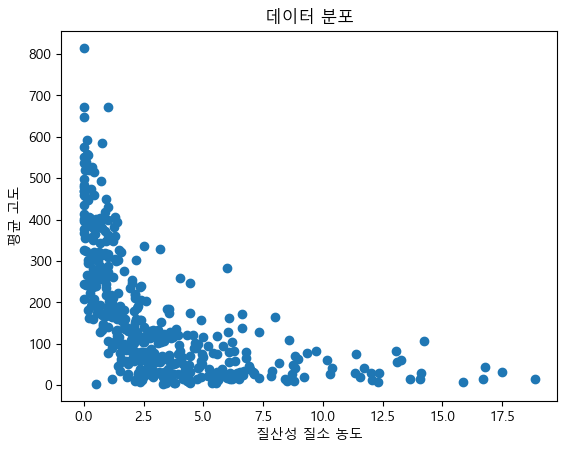

In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows에서는 'Malgun Gothic' 사용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 산점도 (x축: mean, y축: 평균고도)
plt.scatter(data['mean'], data['평균고도'])
plt.title('데이터 분포')
plt.xlabel('질산성 질소 농도')
plt.ylabel('평균 고도')
plt.show()

### 실습 (12)

 데이터 분석
 - 기술통계에서 사용되는 corr() 함수를 이용해 히트맵을 작성해 상관관계를 분석한다.

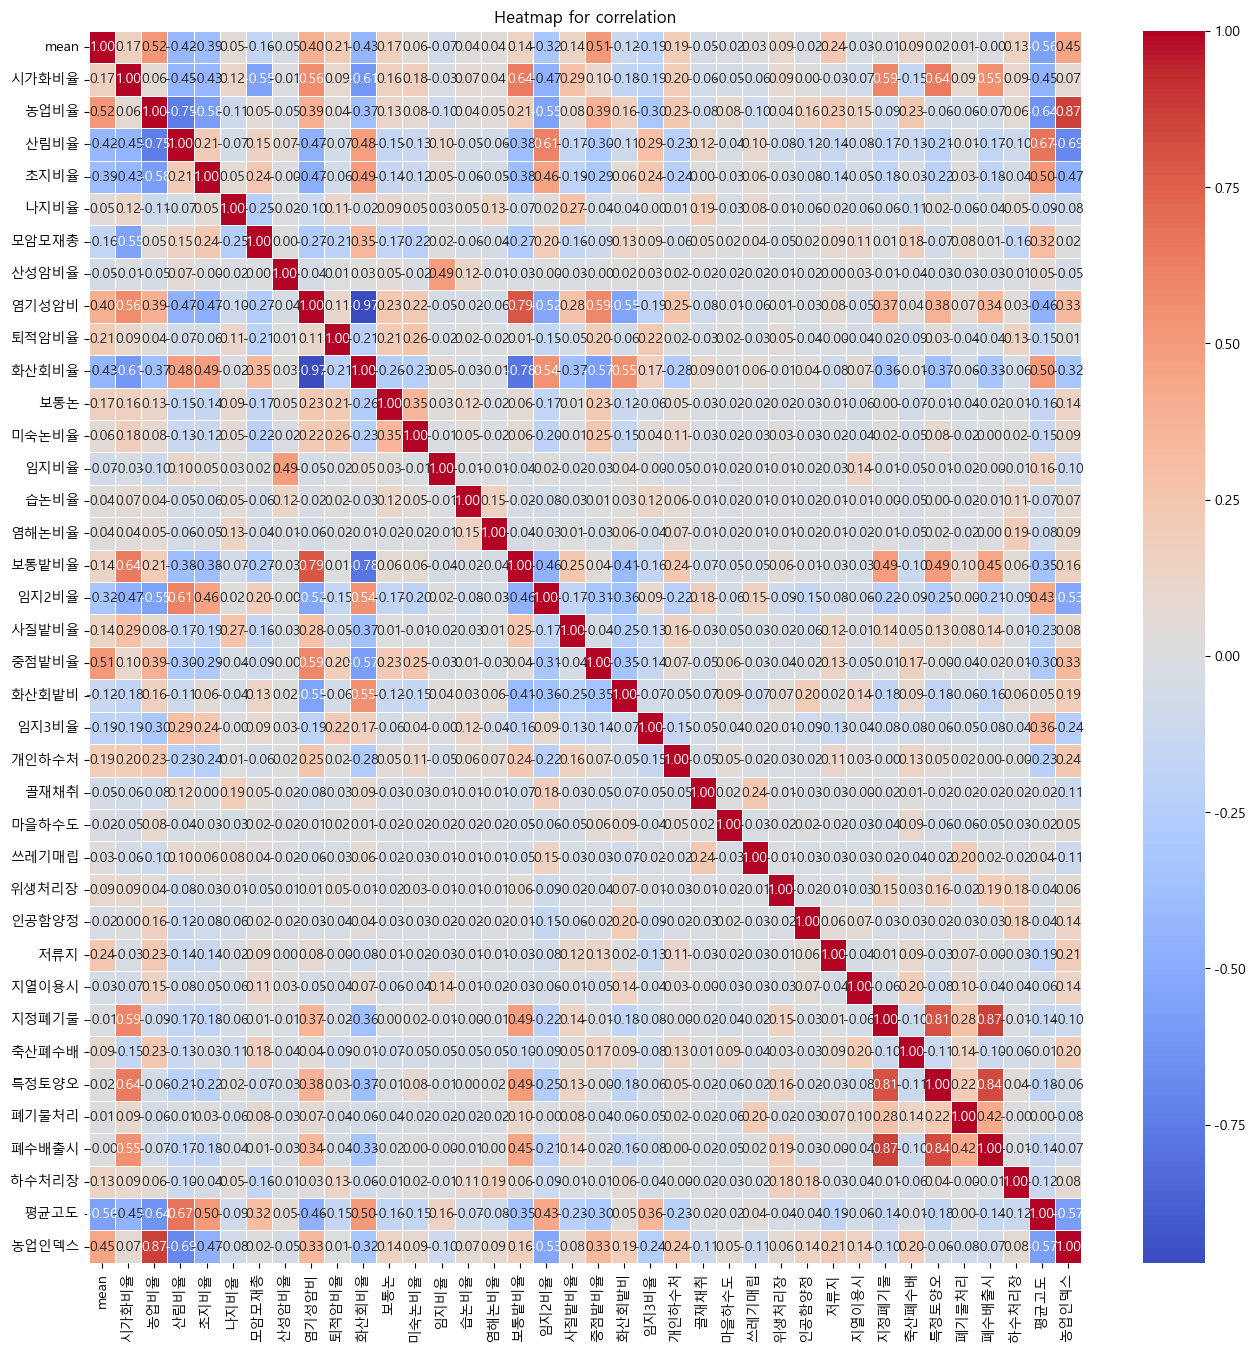

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = data.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap for correlation")
plt.show()



### 실습 (13)

 데이터 분리 및 스케일링
 * 훈련데이터 : 평가데이터 = 8:2
 * 표준화 이용해 데이터 스케일링 진행하였음

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 파일 읽기
jeju = pd.read_excel(r'F:\박정현\ML\Jeju_Water\JejuData.xlsx', engine='openpyxl')
data = jeju.copy()
# 컬럼 이름 트리밍
data.columns = data.columns.str.strip()

# 제거할 컬럼 리스트
drop_col = ['id', 'NO3-N_sum', '95Quantile', 'Count', 'median', '토지피복_1',
            '토지피복_2', '토지피복_3', '토지피복_4','토지피복_6', '토지피복_7', '토지피복_9', 
            '모암모재_0', '모암모재_1', '모암모재_3', '모암모재_4', '모암모재_6', '모암모재_8', 
            '모암모재_9', '토양유형_0','토양유형_1','토양유형_2', '토양유형_3', '토양유형_4', '토양유형_5', 
            '토양유형_6', '토양유형_7', '토양유형_8', '토양유형_9', '토양유형10', '토양유형11', 
            '토양유형12', '토지피복총', '제3기층비?', '토양유형총', '인덱스값', 'x', 'y']


# 불필요한 컬럼 제거 및 결측값 제거
data = data.drop(drop_col, axis=1, errors='ignore')
data = data.dropna()

# 데이터 필터링 및 타입 변환
data = data[data['mean'] != 'no']
data['mean'] = data['mean'].astype(float)

# 컬럼 선택
data_mean = data['mean']
data_x = data.iloc[:, 1:]

# 훈련데이터 : 평가데이터 = 8:2
x_train, x_test, y_train, y_test = train_test_split(data_x, data_mean, test_size=0.2, shuffle=True, random_state=4)

Scaler = StandardScaler()
Scaler.fit(x_train)
x_train_scale = pd.DataFrame(Scaler.transform(x_train), columns=x_train.columns)
x_test_scale = pd.DataFrame(Scaler.transform(x_test), columns=x_test.columns)

### 실습 (14)

하이퍼파라미터 튜닝(1) 
- RF


In [10]:
import random
import pandas as pd
import numpy as np
import optuna
from optuna import Trial
from optuna.pruners import HyperbandPruner
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold

# 랜덤 시드 고정
random.seed(42)
np.random.seed(42)

def objective(trial: Trial):
    # 하이퍼파라미터 탐색 공간 정의
    n_estimators = trial.suggest_int('n_estimators', 30, 300)
    max_depth = trial.suggest_int('max_depth', 2, 12)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 8)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 8)

    # 모델 생성
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # KFold 교차 검증 설정 (5-fold)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    # 교차 검증
    for train_index, valid_index in kf.split(x_train_scale):
        X_fold_train, X_fold_valid = x_train_scale.iloc[train_index], x_train_scale.iloc[valid_index]
        y_fold_train, y_fold_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

        model.fit(X_fold_train, y_fold_train)
        fold_predictions = model.predict(X_fold_valid)
        score = r2_score(y_fold_valid, fold_predictions)
        scores.append(score)

    # 교차 검증 평균 R^2 반환
    return np.mean(scores)

# Hyperband 프루너 설정
pruner = HyperbandPruner(
    min_resource=1,
    max_resource=100,
    reduction_factor=2,
)

# Optuna 스터디 생성 (랜덤 시드 설정)
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction='maximize', sampler=sampler, pruner=pruner)
study.optimize(objective, n_trials=100)

# 최적의 하이퍼파라미터 출력
print("Best hyperparameters: ", study.best_params)
print("Best score: ", study.best_value)

# 최종 모델 학습 및 평가 (Train 데이터 사용)
RF_model = RandomForestRegressor(**study.best_params, random_state=42)
RF_model.fit(x_train_scale, y_train)

# 연습 데이터로 평가
RF_train_prediction = RF_model.predict(x_train_scale)
RF_train_r2 = r2_score(y_train, RF_train_prediction)

# 테스트 데이터로 최종 평가
RF_final_predictions = RF_model.predict(x_test_scale)
RF_final_score = r2_score(y_test, RF_final_predictions)

print("Final score (R^2) on train data: ", RF_train_r2)
print("Final score (R^2) on test data: ", RF_final_score)



[I 2025-01-03 09:42:39,328] A new study created in memory with name: no-name-271ce9c6-b081-4984-875d-1fc2fe524bf9
[I 2025-01-03 09:42:40,348] Trial 0 finished with value: 0.4792865251284658 and parameters: {'n_estimators': 131, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.4792865251284658.
[I 2025-01-03 09:42:40,801] Trial 1 finished with value: 0.4553072157954376 and parameters: {'n_estimators': 72, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.4792865251284658.
[I 2025-01-03 09:42:42,223] Trial 2 finished with value: 0.4797679000428824 and parameters: {'n_estimators': 192, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.4797679000428824.
[I 2025-01-03 09:42:43,965] Trial 3 finished with value: 0.46853517915210074 and parameters: {'n_estimators': 255, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 2 with value: 0

Best hyperparameters:  {'n_estimators': 57, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 3}
Best score:  0.4948263732848462
Final score (R^2) on train data:  0.8517343149245241
Final score (R^2) on test data:  0.5896951302798061


### 실습 (15)

하이퍼파라미터 튜닝(2) 
- ANN
- legacy.Adam 대신 Adamm 사용함 /from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)



In [3]:
import tensorflow as tf
# 즉시 실행 활성화
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()  # tf.data에서도 즉시 실행 활성화

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Dropout, Input
from scikeras.wrappers import KerasRegressor
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam  # Legacy Adam 사용 불가
from sklearn.metrics import r2_score
import random
from sklearn.model_selection import train_test_split, KFold
import optuna
from optuna.pruners import HyperbandPruner
                # os.environ['TF_USE_LEGACY_KERAS'] = 'True' # 이 줄은 삭제함 (tf 1.x 버전)
import numpy as np
# model.fit 함수는 pandas df를 tf 또는 np로 변환해야 함 

# 모델 생성 함수 (은닉층마다 다른 노드 수를 적용)

def create_model(num_units_list, num_layers, dropout_rate, activation, optimizer):
    model = Sequential()
    # 첫 번째 은닉층 (첫 은닉층은 입력 크기 지정)
    model.add(Input(shape=(x_train_scale.shape[1],)))  # 입력층
    model.add(Dense(num_units_list[0], activation=activation))
    model.add(Dropout(dropout_rate))
    
    # 추가 은닉층 (첫 은닉층 제외)
    for i in range(1, num_layers):
        model.add(Dense(num_units_list[i], activation=activation))
        model.add(Dropout(dropout_rate))  # 드롭아웃 추가
    
    # 출력층 (회귀 문제는 활성화 함수 제거)
    model.add(Dense(1))  # 출력층은 1개 노드 (연속적인 값 예측)
    
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model


# Optuna Objective 함수 수정 (R^2 score 최적화)
def objective(trial):
    # 하이퍼파라미터 설정
    num_layers = trial.suggest_int("num_layers", 1, 4)  # 은닉층 수
    dropout_rate = trial.suggest_categorical("dropout_rate", [0.1, 0.2])  # 드롭아웃 비율
    activation = trial.suggest_categorical("activation", ["relu"])  # 활성화 함수
    # optimizer_choice = trial.suggest_categorical("optimizer", ["adam"])  # Adam 옵티마이저 고정 # 삭제
     # 옵티마이저 설정
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # Legacy Adam 옵티마이저 사용 # keras 최신 버전에선 legacy 사용불가
   
    # 각 은닉층의 노드 수 설정 (최대 8개 은닉층)
    num_units_list = [trial.suggest_categorical(f"num_units_{i}", [8, 16, 32, 64, 128, 256]) for i in range(num_layers)]
    
    
    # KFold 교차검증
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_r2_scores = []  # R^2 score 저장 리스트
    
    # y_train이 numpy 배열인지 확인
    # y_train_values = y_train.values if isinstance(y_train, pd.Series) else y_train
     # y_train이 Series인지 확인 후 NumPy 배열로 변환
    y_train_values = y_train.values if hasattr(y_train, "values") else y_train

    for train_idx, val_idx in kf.split(x_train_scale, y_train_values):
        # 데이터를 NumPy 배열 또는 TensorFlow 텐서로 변환
        x_train_fold = np.array(x_train_scale.iloc[train_idx].values)
        x_val_fold = np.array(x_train_scale.iloc[val_idx].values)
        y_train_fold = np.array(y_train_values[train_idx])
        y_val_fold = np.array(y_train_values[val_idx])

        # **새로운 옵티마이저 생성**
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
        
        # 모델 생성
        model = create_model(num_units_list, num_layers, dropout_rate, activation, optimizer)
        
        # 모델 학습
        model.fit(x_train_fold, y_train_fold, epochs=15, batch_size=32, verbose=0)
        
        # 모델 예측 및 R^2 계산
        y_pred = model.predict(x_val_fold)
        fold_r2 = r2_score(y_val_fold, y_pred.flatten())
        fold_r2_scores.append(fold_r2)

    return np.mean(fold_r2_scores)


# Optuna Study 생성 및 최적화 (시드 고정)
def optimize_with_fixed_seed():
    study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42))  # R^2는 최대화 방향
    study.optimize(objective, n_trials=100)
    return study

# 새로운 study 생성 후 실행
study = optimize_with_fixed_seed()

print("Best trial:", study.best_trial)

# Optuna Study 생성 및 최적화 (예시)
import optuna
from optuna.samplers import TPESampler

def optimize_with_fixed_seed():
    study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42))
    study.optimize(objective, n_trials=100)
    return study


# 최적의 하이퍼파라미터 출력
print(f"Best trial: ")
trial = study.best_trial
print(f"R^2: {trial.value}")
print(f"Parameters: ")
for key, value in trial.params.items():
    print(f"{key}: {value}")


# 최적의 파라미터로 모델 학습
best_params = trial.params
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # legacy Adam 옵티마이저 사용 # 파이썬 버전 호환 불일치 이슈로 코드 패치

# best_params에서 num_units_list 추출
num_layers = best_params["num_layers"]
num_units_list = [best_params[f"num_units_{i}"] for i in range(num_layers)]  # 각 은닉층의 노드 수를 리스트로 생성

ANN_model = create_model(
    num_units_list,
    num_layers,
    best_params["dropout_rate"],
    best_params["activation"],
    optimizer
)

ANN_model.fit(x_train_scale.values, y_train.values, epochs=30, batch_size=32, verbose=0)

# 모델 저장
ANN_model.save("ANN_model_TEST.h5")  # 모델 저장 (HDF5 형식으로)

# 학습 평가
Train_prd = ANN_model.predict(x_train_scale.values)
Train_r2 = r2_score(y_train, Train_prd)  # R^2 계산

# 테스트 평가
Test_prd = ANN_model.predict(x_test_scale.values)
Test_r2 = r2_score(y_test, Test_prd)

# 평가 결과 출력
print(f"Train R^2: ", Train_r2)
print(f"Test R^2: ", Test_r2)



[I 2025-01-07 11:24:23,533] A new study created in memory with name: no-name-4a6f0613-4ba9-4078-87e6-ed1fc7e93d8b
[W 2025-01-07 11:24:23,556] Trial 0 failed with parameters: {'num_layers': 2, 'dropout_rate': 0.1, 'activation': 'relu', 'num_units_0': 128, 'num_units_1': 32} because of the following error: NameError("name 'y_train' is not defined").
Traceback (most recent call last):
  File "C:\Users\EDAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\EDAM\AppData\Local\Temp\ipykernel_17036\4200618356.py", line 63, in objective
    y_train_values = y_train.values if hasattr(y_train, "values") else y_train
                                               ^^^^^^^
NameError: name 'y_train' is not defined
[W 2025-01-07 11:24:23,565] Trial 0 failed with value None.


NameError: name 'y_train' is not defined

### 실습(16)
 - 결과 시각화

In [12]:
# 글자 크기 설정
plt.rc('font', size=14)          # 기본 폰트 크기
plt.rc('axes', titlesize=20)     # 축 타이틀 폰트 크기
plt.rc('axes', labelsize=18)     # x, y 레이블 폰트 크기
plt.rc('xtick', labelsize=15)    # x축 눈금 레이블 폰트 크기
plt.rc('ytick', labelsize=15)    # y축 눈금 레이블 폰트 크기
plt.rc('legend', fontsize=16)    # 범례 폰트 크기
plt.rc('figure', titlesize=16)   # 그림 타이틀 폰트 크기
plt.rc('legend', fontsize=12)    # 범례 폰트 크기

In [1]:
# ANN

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# 그래프 시각화 함수 정의
def graph(model, title, x_train, x_test, y_train, y_test):
    # 모델 예측
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # R² 및 RMSE 계산
    r2_train = round(r2_score(y_train, y_pred_train), 3)
    rmse_train = round(sqrt(mean_squared_error(y_train, y_pred_train)), 3)

    r2_test = round(r2_score(y_test, y_pred_test), 3)
    rmse_test = round(sqrt(mean_squared_error(y_test, y_pred_test)), 3)

    # Axes 객체 생성
    fig, ax = plt.subplots(figsize=(8, 8))

    # 훈련 데이터 산포도
    ax.scatter(y_train, y_pred_train, color='blue', label='Train Data', alpha=0.6)

    # 테스트 데이터 산포도
    ax.scatter(y_test, y_pred_test, color='red', label='Test Data', alpha=0.6)

    # x, y축 범위 일치 및 여백 추가
    max_val = max(y_train.max(), y_test.max(), y_pred_train.max(), y_pred_test.max())
    min_val = min(y_train.min(), y_test.min(), y_pred_train.min(), y_pred_test.min())
    margin = (max_val - min_val) * 0.05  # 최대값에 대한 여백

    ax.set_xlim(min_val - margin, max_val + margin)
    ax.set_ylim(min_val - margin, max_val + margin)

    # y=x 선 설정
    ax.plot([min_val - margin, max_val + margin], [min_val - margin, max_val + margin], 'k-', linewidth=1.5)

    # 그래프 설정
    ax.set_xlabel('True Values', fontsize=16)
    ax.set_ylabel('Predictions', fontsize=16)
    ax.legend(fontsize=15)
    ax.grid()

    # 성능 지표 텍스트로 출력
    ax.text(0.70, 0.8, f'Train R²: {r2_train:.3f}\nTrain RMSE: {rmse_train:.3f}\n'
                       f'Test R²: {r2_test:.3f}\nTest RMSE: {rmse_test:.3f}',
            transform=ax.transAxes, fontsize=17, verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

    # 그래프 표시
   
    plt.show()          # 그래프 창이 닫히지 않도록 설정

# ANN 모델링 결과 시각화
graph(ANN_model, "ANN Model Results", x_train_scale, x_test_scale, y_train, y_test)


NameError: name 'ANN_model' is not defined

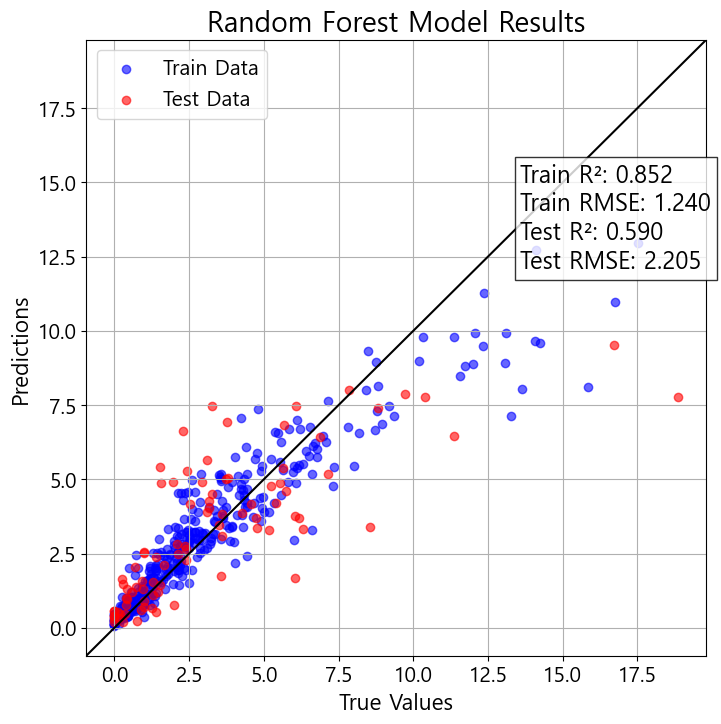

In [14]:
# RF

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# 그래프 시각화 함수 정의
def graph_rf(model, title, x_train, x_test, y_train, y_test):
    # 모델 예측
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # R² 및 RMSE 계산
    r2_train = round(r2_score(y_train, y_pred_train), 3)
    rmse_train = round(sqrt(mean_squared_error(y_train, y_pred_train)), 3)

    r2_test = round(r2_score(y_test, y_pred_test), 3)
    rmse_test = round(sqrt(mean_squared_error(y_test, y_pred_test)), 3)

    # Axes 객체 생성
    fig, ax = plt.subplots(figsize=(8, 8))

    # 훈련 데이터 산포도
    ax.scatter(y_train, y_pred_train, color='blue', label='Train Data', alpha=0.6)

    # 테스트 데이터 산포도
    ax.scatter(y_test, y_pred_test, color='red', label='Test Data', alpha=0.6)

    # x, y축 범위 일치 및 여백 추가
    max_val = max(y_train.max(), y_test.max(), y_pred_train.max(), y_pred_test.max())
    min_val = min(y_train.min(), y_test.min(), y_pred_train.min(), y_pred_test.min())
    margin = (max_val - min_val) * 0.05  # 최대값에 대한 여백

    ax.set_xlim(min_val - margin, max_val + margin)
    ax.set_ylim(min_val - margin, max_val + margin)

    # y=x 선 설정
    ax.plot([min_val - margin, max_val + margin], [min_val - margin, max_val + margin], 'k-', linewidth=1.5)

    # 그래프 설정
    ax.set_xlabel('True Values', fontsize=16)
    ax.set_ylabel('Predictions', fontsize=16)
    ax.legend(fontsize=15)
    ax.grid()

    # 성능 지표 텍스트로 출력
    ax.text(0.70, 0.8, f'Train R²: {r2_train:.3f}\nTrain RMSE: {rmse_train:.3f}\n'
                       f'Test R²: {r2_test:.3f}\nTest RMSE: {rmse_test:.3f}',
            transform=ax.transAxes, fontsize=17, verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

    # 그래프 표시
    plt.title(title)
    plt.show()         

# RF 모델 결과 시각화
graph_rf(RF_model, "Random Forest Model Results", x_train_scale, x_test_scale, y_train, y_test)


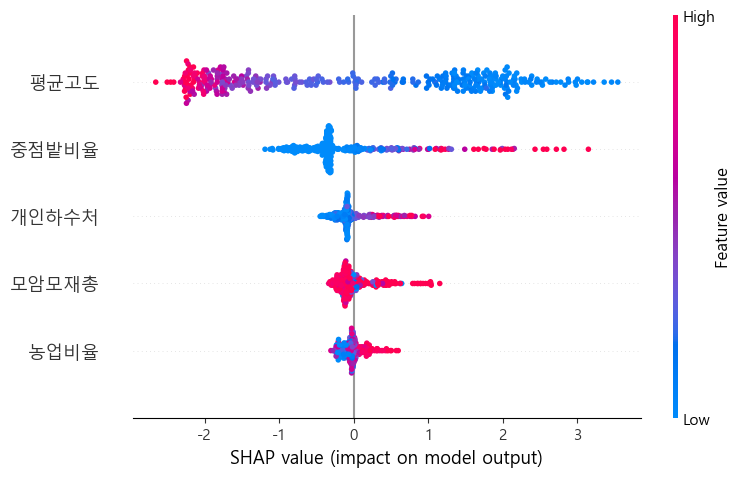

In [15]:
# RF SHAP
import shap
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows의 맑은 고딕 경로
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# SHAP 분석 함수 정의
def shap_modeling_rf(model, x_train):
    # SHAP 초기화 (시각화를 위한 설정)
    shap.initjs()

    # TreeExplainer 생성 (Random Forest 모델에 적합)
    explainer = shap.TreeExplainer(model)

    # SHAP 값 계산
    shap_values = explainer.shap_values(x_train)
    
     # 요약 플롯 시각화 (plot_size로 크기 설정)
    shap.summary_plot(
        shap_values,
        x_train,
        feature_names=x_train.columns,  # x_train이 DataFrame일 경우
        max_display=5,  # 최대 표시할 변수 개수
        plot_size=(8, 5)  # 그래프 크기 설정 (가로 8인치, 세로 5인치)
    )

    return shap_values

# Random Forest 모델의 SHAP 결과 시각화
shap_values_rf = shap_modeling_rf(RF_model, x_train_scale)



In [2]:
# ANN SHAP
import shap

def shap_modeling_ANN(model, x_train):
    """
    ANN 모델의 SHAP 값을 계산하고 요약 플롯을 시각화합니다.
    
    Parameters:
    model : Trained ANN model
        ANN 모델 객체 (predict 메서드 사용 가능).
    x_train : ndarray or DataFrame
        훈련 데이터.
    
    Returns:
    shap_values : ndarray
        계산된 SHAP 값.
    """
    # SHAP 초기화 (시각화를 위한 JS 활성화)
    shap.initjs()
    
    # KernelExplainer 생성 (x_train 샘플 일부를 기준으로 SHAP 계산)
    explainer = shap.KernelExplainer(model.predict, x_train)
    
    # SHAP 값 계산
    shap_values = explainer.shap_values(x_train)
    shap_values = shap_values[0]  # 다중 출력인 경우 첫 번째 출력값 사용
    
    # 요약 플롯 시각화 (특성 중요도)
    shap.summary_plot(shap_values, x_train, max_display=5)
    
    return shap_values
shap_values = shap_modeling_ANN(ANN_model, x_train_scale)

C:\Users\EDAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'ANN_model' is not defined